**TrackML Kaggle Challenge**

**Event hits**

The hits file contains the following values for each hit/entry:

- *hit_id*: numerical identifier of the hit inside the event.
- *x, y, z*: measured x, y, z position (in millimeter) of the hit in global coordinates.
- *volume_id*: numerical identifier of the detector group.
- *layer_id*: numerical identifier of the detector layer inside the group.
- *module_id*: numerical identifier of the detector module inside the layer.

The volume/layer/module id could in principle be deduced from x, y, z. They are given here to simplify detector-specific data handling.

**Event truth**

The truth file contains the mapping between hits and generating particles and the true particle state at each measured hit. Each entry maps one hit to one particle.

- *hit_id*: numerical identifier of the hit as defined in the hits file.
- *particle_id*: numerical identifier of the generating particle as defined in the particles file. A value of 0 means that the hit did not originate from a reconstructible particle, but e.g. from detector noise.
- *tx, ty, tz* true intersection point in global coordinates (in millimeters) between the particle trajectory and the sensitive   surface.
- *tpx, tpy, tpz* true particle momentum (in GeV/c) in the global coordinate system at the intersection point. The corresponding vector is tangent to the particle trajectory at the intersection point.
- *weight* per-hit weight used for the scoring metric; total sum of weights within one event equals to one.

**Event particles**

The particles files contains the following values for each particle/entry:

- particle_id: numerical identifier of the particle inside the event.
- vx, vy, vz: initial position or vertex (in millimeters) in global coordinates.
- px, py, pz: initial momentum (in GeV/c) along each global axis.
- q: particle charge (as multiple of the absolute electron charge).
- nhits: number of hits generated by this particle.
All entries contain the generated information or ground truth.

**Event hit cells**
The cells file contains the constituent active detector cells that comprise each hit. The cells can be used to refine the hit to track association. A cell is the smallest granularity inside each detector module, much like a pixel on a screen, except that depending on the volume_id a cell can be a square or a long rectangle. It is identified by two channel identifiers that are unique within each detector module and encode the position, much like column/row numbers of a matrix. A cell can provide signal information that the detector module has recorded in addition to the position. Depending on the detector type only one of the channel identifiers is valid, e.g. for the strip detectors, and the value might have different resolution.

- *hit_id*: numerical identifier of the hit as defined in the hits file.
- *ch0, ch1*: channel identifier/coordinates unique within one module.
- *value*: signal value information, e.g. how much charge a particle has deposited.

**Dataset submission information**

The submission file must associate each hit in each event to one and only one reconstructed particle track. The reconstructed tracks must be uniquely identified only within each event. Participants are advised to compress the submission file (with zip, bzip2, gzip) before submission to the Kaggle site.

- *event_id*: numerical identifier of the event; corresponds to the number found in the per-event file name prefix.
- *hit_id*: numerical identifier of the hit inside the event as defined in the per-event hits file.
- *track_id*: user-defined numerical identifier (non-negative integer) of the track.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import histbook as hb
%matplotlib inline

In [2]:
from trackml.dataset import load_event
from trackml.dataset import load_dataset
from trackml.score import score_event

In [3]:
hits, cells, particles, truth = load_event('../data/train/event000001000')

In [4]:
hits = hits.set_index('hit_id')
truth = truth.set_index('hit_id')
# remove all particles without hits
particles = particles[particles.nhits > 0].set_index('particle_id')

In [17]:
index = hits.index[hits.index == 1]
index.empty

False

In [5]:
print particles.nhits.sum() + np.sum(truth.particle_id == 0)
print hits.shape[0]

120939
120939


In [55]:
x = hits.loc[:,'x':'z'] - hits.loc[1,'x':'z']
x = x.multiply(x).sum(axis=1)
track = [1,5,6]
hits.index[x < 100].drop(track).argmax()

14

In [56]:
particles

,vx,vy,vz,px,py,pz,q,nhits
particle_id,,,,,,,,
4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3
4504011944230912,-0.009288,0.009861,-0.077879,0.795277,-1.685200,-3.520890,1,12
4504080663707648,-0.009288,0.009861,-0.077879,-0.563433,0.305370,6.167120,-1,14
4504355541614592,-0.009288,0.009861,-0.077879,-0.501267,0.049825,-0.213011,-1,17
4504424261091328,-0.009288,0.009861,-0.077879,-1.652120,0.453142,-0.533958,-1,12
4504561700044800,-0.009288,0.009861,-0.077879,-0.249551,-0.434369,-0.189168,-1,10


In [57]:
tracks = dict()
for particle in set(truth.particle_id[truth.particle_id > 0]):
    tracks[particle] = truth[truth.particle_id == particle].drop(columns = ['particle_id','weight'])
    
nhits = [len(tracks[particle]) for particle in tracks.keys()]

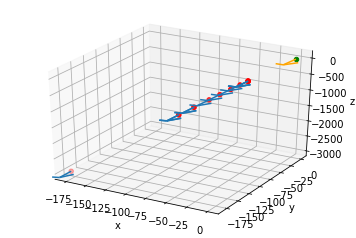

In [58]:
def plot_track(index):
    ax = plt.figure().gca(projection='3d')
    particle_id = tracks.keys()[index] 
    t = tracks[particle_id]
    x0 = particles.loc[particle_id,'vx':'vz']
    p0 = particles.loc[particle_id,'px':'pz']
    x = t.loc[:,'tx':'tz']
    p = t.loc[:,'tpx':'tpz']
    ax.scatter(x0['vx'], x0['vy'], x0['vz'], color='green')
    ax.quiver(x0['vx'], x0['vy'], x0['vz'], p0['px'], p0['py'], p0['pz'], length=20, color='orange')
    ax.scatter(x['tx'], x['ty'], x['tz'], color='red')
    ax.quiver(x['tx'], x['ty'], x['tz'], p['tpx'], p['tpy'], p['tpz'], length=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
    
plot_track(75)

In [59]:
nhits2 = [particles.loc[particle].nhits for particle in tracks.keys()]

In [60]:
np.all(nhits==nhits2)

True

In [61]:
def toSphericalCoordinates(particle_id):
    "Perform a transformation from cartesian to spherical coordinates and returns an ordered table of hits in these coordinates"
    track = tracks[particle_id]
    x = track.loc[:,'tx':'tz']
    x0 = x.copy()
    p = particles.loc[particle_id,'px':'pz'].values
    pp = np.sqrt(np.dot(p,p))
    p = p/pp
    for i in x0.index:
        x0.loc[i,'tx':'tz'] = particles.loc[particle_id,'vx':'vz'].values
    r = x - x0
    df = pd.DataFrame(columns = ('r', 'phi'))
    rr = np.sqrt(r['tx'] * r['tx'] + r['ty'] * r['ty'] + r['tz'] * r['tz'])
    # r is the distance between the particle initial origin and the hit coordinates
    df['r'] = rr
    # phi is the angle between the particle's initial momemtum and the position vector from the particle's initial origin
    df['phi'] = np.arccos(r.values.dot(p) / df['r'])
    return df.sort_values('r', axis = 0)
    
df = toSphericalCoordinates(tracks.keys()[552])
df

,r,phi
hit_id,,
22486,54.852402,0.022905
31067,122.048340,0.048021
38309,195.646896,0.078213
44888,292.650330,0.118657
76344,440.841370,0.182086
83810,622.554688,0.261235
90710,879.789001,0.368576
90708,893.656433,0.374310
97078,1247.840576,0.515025


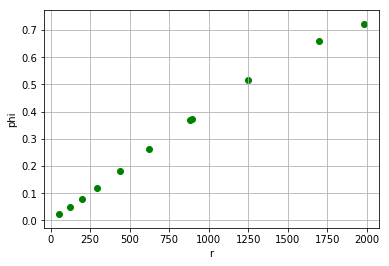

In [62]:
ax = plt.figure().gca()
ax.scatter(df['r'], df['phi'], color='green')
ax.set_xlabel('r')
ax.set_ylabel('phi')
plt.grid()
plt.show()

In [63]:
# the distribution of r and phi for a particular event
r = np.zeros((len(tracks.keys())))
phi = np.zeros((len(tracks.keys())))
q = np.zeros((len(tracks.keys())))
p = np.zeros((len(tracks.keys())))
for index, particle_id in enumerate(tracks.keys()):
    hits = toSphericalCoordinates(particle_id)
    q[index] = particles.loc[particle_id,'q']
    p[index] = np.sqrt(np.dot(particles.loc[particle_id,'px':'pz'].values, particles.loc[particle_id,'px':'pz'].values))
    r[index] = hits['r'].iloc[0]
    phi[index] = hits['phi'].iloc[0]

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in arccos


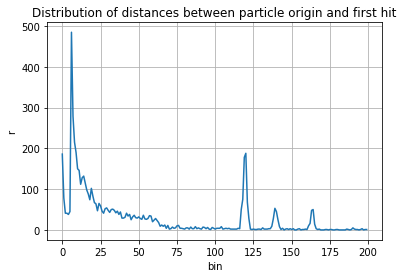

In [64]:
hist = np.histogram(r[q>0],bins=200,range=(0,1000))
plt.plot(hist[0])
plt.grid()
plt.title('Distribution of distances between particle origin and first hit')
plt.ylabel('r')
plt.xlabel('bin')

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


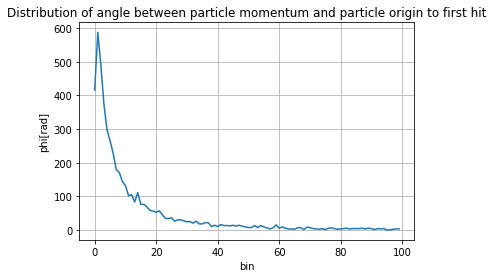

In [65]:
hist = np.histogram(phi[q>0],bins=100,range=(0,0.1))
plt.plot(hist[0])
plt.grid()
plt.title('Distribution of angle between particle momentum and particle origin to first hit')
plt.ylabel('phi[rad]')
plt.xlabel('bin')

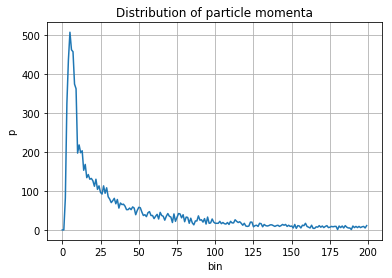

In [66]:
hist = np.histogram(p,bins=200,range=(0,10))
plt.plot(hist[0])
plt.grid()
plt.title('Distribution of particle momenta')
plt.ylabel('p')
plt.xlabel('bin')

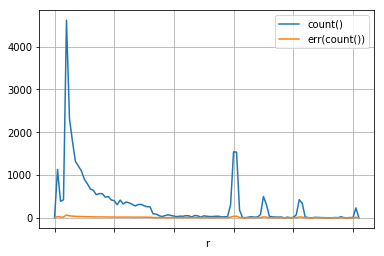

In [67]:
hist = hb.Hist(hb.bin("r", 100, 0, 1000))
hist.fill(r=r)
hist.fill(r=r)
hist.fill(r=r)
hist.pandas().plot().grid()

In [68]:
hist = hist + hist

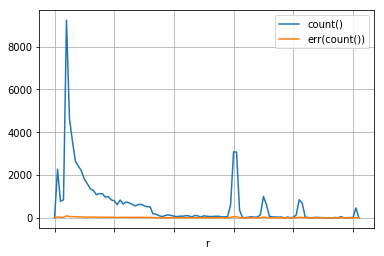

In [69]:
hist.pandas().plot().grid()

In [70]:
hist = 0.1*hist

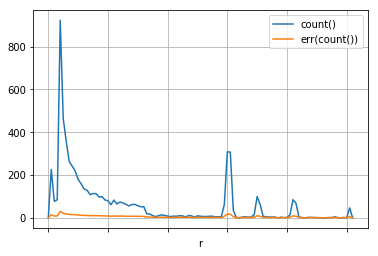

In [71]:
hist.pandas().plot().grid()

In [73]:
import json

hist = hb.Hist(hb.bin('x',200,-1000,1000), hb.bin('y',200,-1000,1000), hb.bin('z',200,-1000,1000))
for event, hits, cells, particles, truth in load_dataset('../data/train/'):
    hits = hits.set_index('hit_id')
    truth = truth.set_index('hit_id')
    particles = particles.set_index('particle_id')
    tracks = dict()
    l = list()
    for particle in set(truth.particle_id[truth.particle_id > 0]):
        df = truth[truth.particle_id == particle].drop(columns = ['tpx','tpy','tpz','particle_id','weight'])
        x0 = np.tile(particles.loc[particle,'vx':'vz'].values, (df.shape[0],1))
        x = df.values - x0
        r = np.sqrt(np.sum(x*x,axis = 1))
        df['r'] = r
        tracks[particle] = df.sort_values('r', axis = 0)
        l.append(tracks[particle].iloc[0,0:3].values)        
    x0 = np.asarray(l)
    hist.fill(x = x0[:,0],y = x0[:,1],z = x0[:,2])
    print event
    #f = open('../data/train/hist' + str(event) + '.json','w')
    #json.dump(hist.tojson(),f)
    #f.close()

1000
1001


KeyboardInterrupt: 

**Finding the maximum of a Gaussian mixture model**

The maximum of a Gaussian mixture model with $N$ distributions is given by the equation
$$\vec{x} = \frac{\sum_{i=1}^{N}\alpha_i\frac{\vec{\mu}_i}{\sigma_i^2}\frac{1}{\left(\sqrt{2\pi\sigma_i^2}\right)^d}\exp\left(-\frac{(\vec{x}-\vec{\mu}_i)^2}{2\sigma_i^2}\right)}
      {\sum_{i=1}^{N}\alpha_i\frac{1}{\sigma_i^2}\frac{1}{\left(\sqrt{2\pi\sigma_i^2}\right)^d}\exp\left(-\frac{(\vec{x}-\vec{\mu}_i)^2}{2\sigma_i^2}\right)}$$      
which can be solved iteratively.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def log_sum_exp(x, axis = None):
    """ Log-sum-exp trick implementation """
    x_max = np.max(x, axis = axis, keepdims = True)
    return np.log(np.sum(np.exp(x - x_max), 
                       axis = axis, keepdims = True)) + x_max

def GaussianMixtureModel(x,alpha,mu,sigma):
    """
    Calculates the logarithmic probability density of a Gaussian mixture model
    """
    output_dim = x.shape[1]
    exponent = -np.sum((x-mu)**2, axis = 1)
    exponent = exponent/(2*sigma**2)
    exponent = exponent - 0.5 * output_dim*np.log(2*np.pi) - output_dim * np.log(sigma) + np.log(alpha)
    return log_sum_exp(exponent)

def GaussianMixtureModelArgMax(x,alpha,mu,sigma):
    """
    Returns the argument, where the Gaussian mixture model has a the local maxima closest to x 
    """
    output_dim = x.shape[1]
    exponent = -np.sum((x-mu)**2, axis = 1) 
    exponent = exponent/(2*sigma**2)
    exponent = exponent - 0.5 * output_dim * np.log(2*np.pi) - (output_dim + 2) * np.log(sigma) + np.log(alpha)
    log_Z = log_sum_exp(exponent)
    return np.array([np.sum(mu[:,i] * np.exp(exponent - log_Z)) for i in range(output_dim)]).reshape((-1,output_dim))

In [ ]:
n = 10
x = np.zeros((n,n))
alpha = np.array([0.5,0.3,0.1,0.1])
mu = np.array([[5,0],[8,8],[-0.5,0.5],[0.5,-1]])
sigma = np.array([0.5,0.1,0.1,0.2])
for i in range(n):
    for j in range(n):
        x[i,j] = GaussianMixtureModel(np.array([[i,j]]),alpha,mu,sigma)
plt.imshow(x, cmap="viridis")
plt.colorbar()

In [ ]:
x = np.array([[7,9]])
x = GaussianMixtureModelArgMax(x,alpha,mu,sigma)
# x = GaussianMixtureModelArgMax(x,alpha,mu,sigma)
# x = GaussianMixtureModelArgMax(x,alpha,mu,sigma)
print x
print GaussianMixtureModel(x,alpha,mu,sigma)
print '------------------'
for i in range(mu.shape[0]):
    print 'mu[' + str(i) + '] = ' + str(mu[i,:].reshape([1,-1]))
    print 'logp at mu[' + str(i) + '] = ' + str(GaussianMixtureModel(mu[i,:].reshape([1,-1]),alpha,mu,sigma))